In [43]:
import numpy as np
import pickle
#import pickle5 as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [44]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [45]:
def variance_of_ratio(x, y):
    
    def _get_covariance(x, y):
        # in theory, this should be the same as
        # np.diag(np.cov(dif.T, nom.T, rowvar=True)[x.shape[1]:, :x.shape[1]])
        cov = []
        for d in range(x.shape[1]):
            cov_xy = np.cov(np.array([x[:, d], y[:, d]]), bias=True)
            assert cov_xy.shape == (2,2)
            cov.append(cov_xy[0,1])
        return cov
        

    n = x.shape[0]
    var_x = np.var(x, axis=0)
    mean_x = np.mean(x, axis=0)
    var_y = np.var(y, axis=0)
    mean_y = np.mean(y, axis=0)
    
    cov_xy = _get_covariance(x, y)
    term1 = var_x / np.power(mean_y, 2)
    term2 = np.power(mean_x, 2) * var_y / np.power(mean_y, 4)
    term3 = 2 * mean_x * cov_xy / np.power(mean_y, 3)
    
    return 1/n*(term1 + term2 - term3)

In [46]:
dataset = 'mnist'
model_size = 'mnist'

with open('results/'+dataset+'/random-'+model_size+'.pickle', 'rb') as handle:
    random = pickle.load(handle)

with open('results/'+dataset+'/bald-'+model_size+'.pickle', 'rb') as handle:
    bald = pickle.load(handle)

with open('results/'+dataset+'/cbald-'+model_size+'.pickle', 'rb') as handle:
    cbald = pickle.load(handle)

with open('results/'+dataset+'/duobald-'+model_size+'.pickle', 'rb') as handle:
    duobald = pickle.load(handle)

with open('results/'+dataset+'/unc-' + model_size +'.pickle', 'rb') as handle:
    unc = pickle.load(handle)
    
best_performance = np.min(np.concatenate((random['model_tobit'],
                                        unc['model_tobit'],
                                        bald['model_tobit'],
                                        cbald['model_tobit'])))#,
                                        #duobald['model_tobit'])))
best_performance = 0 if best_performance > 0 else best_performance

In [47]:
col = 'model_tobit'
rand_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(random['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
unc_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(unc['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
#duobald_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))

rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
unc_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, unc['model_perf']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
#duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

mnist & $0.00 \pm -0.00$ & $-1.77 \pm 1.36$ &  $2.20 \pm 1.99$ & $29.09 \pm  12.28$  \\


In [48]:
rand_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(random['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
unc_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(unc['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
cbald_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(cbald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(bald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
#duobald_perf= 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(duobald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))

rand_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, random['model_tobit']-best_performance),axis=0)
unc_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, unc['model_tobit']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, bald['model_tobit']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, cbald['model_tobit']-best_performance),axis=0)
#duobald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, duobald['model_tobit']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

mnist & $0.00 \pm -0.00$ & $-0.05 \pm 0.28$ &  $1.06 \pm 0.30$ & $13.47 \pm  0.66$  \\


In [49]:
rand_perf =np.mean(random['model_tobit'],axis=0)[-1]
unc_perf =np.mean(unc['model_tobit'],axis=0)[-1]
cbald_perf =np.mean(cbald['model_tobit'],axis=0)[-1]
bald_perf = np.mean(bald['model_tobit'],axis=0)[-1]
#duobald_perf= np.mean(duobald['model_tobit'],axis=0)[-1]

rand_unc = np.std(random['model_tobit'],axis=0)[-1]
unc_unc = np.std(unc['model_tobit'],axis=0)[-1]
bald_unc = np.std(bald['model_tobit'],axis=0)[-1]
cbald_unc = np.std(cbald['model_tobit'],axis=0)[-1]
#duobald_unc = np.std(duobald['model_perf'],axis=0)[-1]
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm {:,.1f}$ &  ${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm  {:,.1f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

mnist & $2,121.0 \pm 252.4$ & $2,262.9 \pm 480.2$ &  $2,069.7 \pm 474.4$ & $1,826.2 \pm  381.8$  \\


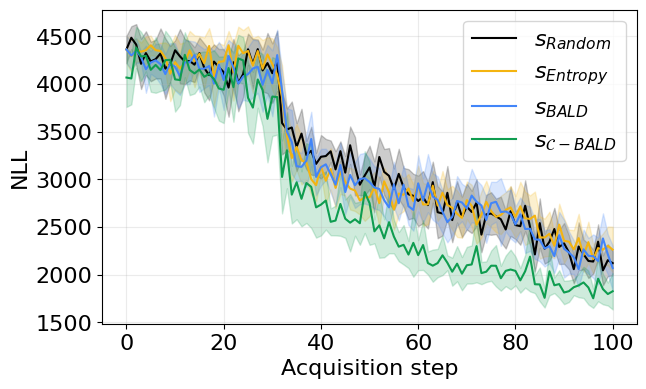

In [50]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)

col = 'model_tobit'
plt.plot(np.mean(random[col],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc[col],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald[col],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald[col],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
#plt.plot(np.mean(duobald[col],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random[col].shape[-1]), y1 = np.mean(random[col], axis=0)-0.5*np.std(random[col], axis=0),
                                                    y2 = np.mean(random[col], axis=0)+0.5*np.std(random[col], axis=0),alpha=0.2, color='black')
plt.fill_between(np.arange(unc[col].shape[-1]), y1 = np.mean(unc[col], axis=0)-0.5*np.std(unc[col], axis=0),
                                                    y2 = np.mean(unc[col], axis=0)+0.5*np.std(unc[col], axis=0),alpha=0.2, color='#F4B410')
plt.fill_between(np.arange(bald[col].shape[-1]), y1 = np.mean(bald[col], axis=0)-0.5*np.std(bald[col], axis=0),
                                                    y2 = np.mean(bald[col], axis=0)+0.5*np.std(bald[col], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald[col].shape[-1]), y1 = np.mean(cbald[col], axis=0)-0.5*np.std(cbald[col], axis=0),
                                                    y2 = np.mean(cbald[col], axis=0)+0.5*np.std(cbald[col], axis=0),alpha=0.2, color='#0F9D50')
#plt.fill_between(np.arange(avg['model_perf'].shape[-1]), y1 = np.mean(avg['model_perf'], axis=0)-np.std(avg['model_perf'], axis=0),
#                                                    y2 = np.mean(avg['model_perf'], axis=0)+np.std(avg['model_perf'], axis=0),alpha=0.50)
#plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
#                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

#plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
#                                                    y2 = np.mean(duobald['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig("MNIST.pdf")


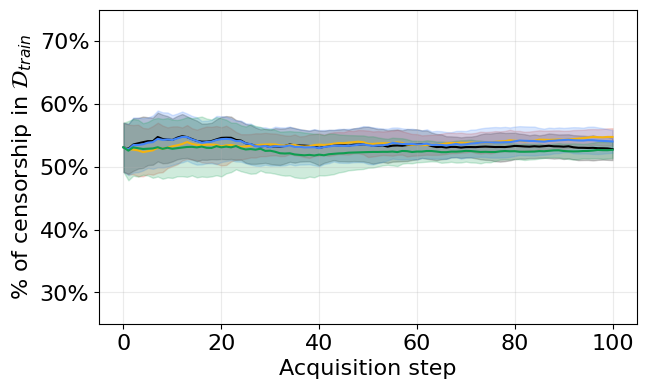

In [51]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['censored'],axis=0), label='Random', color='black')
plt.plot(np.mean(unc['censored'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['censored'],axis=0), label='Bald', color='#4285F9')
plt.plot(np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
#plt.plot(np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = np.mean(random['censored'], axis=0)-np.std(random['censored'], axis=0),
                                                    y2 = np.mean(random['censored'], axis=0)+np.std(random['censored'], axis=0),alpha=0.20, color='black')

plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = np.mean(unc['censored'], axis=0)-np.std(unc['censored'], axis=0),
                                                    y2 = np.mean(unc['censored'], axis=0)+np.std(unc['censored'], axis=0),alpha=0.2, color='#DB4430')

plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = np.mean(bald['censored'], axis=0)-np.std(bald['censored'], axis=0),
                                                    y2 = np.mean(bald['censored'], axis=0)+np.std(bald['censored'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = np.mean(cbald['censored'], axis=0)-np.std(cbald['censored'], axis=0),
                                                    y2 = np.mean(cbald['censored'], axis=0)+np.std(cbald['censored'], axis=0),alpha=0.2, color='#0F9D50')

#plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = np.mean(duobald['censored'], axis=0)-np.std(duobald['censored'], axis=0),
#                                                    y2 = np.mean(duobald['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.ylim(0.25, 0.75)
plt.grid(alpha=0.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.legend(loc='upper right')
plt.savefig("MNIST_censorship.pdf")
plt.show()

In [52]:
dataset = 'gsbg'
layers = [2, 3,4]
size = [64, 128,256]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)
            
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        #with open('results/'+dataset+'/classbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    classbald = pickle.load(handle)
        #with open('results/'+dataset+'/gaussbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    gaussbald = pickle.load(handle)

        best_performance = np.min(np.concatenate((random['model_perf'],
                                                bald['model_perf'],
                                                cbald['model_perf'],
                                                unc['model_perf'])))
        best_performance = 0 if best_performance > 0 else best_performance


        rand_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(random['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        unc_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(unc['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        
        rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
        bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
        cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
        unc_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, unc['model_perf']-best_performance),axis=0)
        #print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))
        #print(dataset + " & " + str(s) + " & " + str(l) + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

In [55]:
dataset = 'breastMSK'
layers = [2, 3,4]
size = [64, 128,256]

for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)
            
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        #with open('results/'+dataset+'/classbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    classbald = pickle.load(handle)
        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)


        best_performance = np.min(np.concatenate((random['model_tobit'],
                                                bald['model_tobit'],
                                                cbald['model_tobit'],
                                                unc['model_tobit'])))#,
                                                #duobald['model_tobit'])))
        best_performance = 0 if best_performance > 0 else best_performance


        rand_perf= 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(random['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
        cbald_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(cbald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
        bald_perf = 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(bald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
        unc_perf= 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(unc['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
        #duobald_perf = 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(duobald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))        
        rand_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, random['model_tobit']-best_performance),axis=0)
        bald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, bald['model_tobit']-best_performance),axis=0)
        cbald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, cbald['model_tobit']-best_performance),axis=0)
        unc_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, unc['model_tobit']-best_performance),axis=0)
        #duobald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, duobald['model_tobit']-best_performance),axis=0)
        #print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))
        #print(dataset + " & " + str(s) + " & " + str(l) + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$& ${:,.2f} \pm  {:,.2f}$ \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 
        print(dataset + " & " + str(s) + " & " + str(l) + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

breastMSK & 64 & 2 & $0.00 \pm 0.00$ & $3.57 \pm 0.67$ &  $0.80 \pm 0.36$ & $-12.49 \pm  0.33$ \\
breastMSK & 128 & 2 & $0.00 \pm -0.00$ & $9.31 \pm 0.96$ &  $0.74 \pm 0.41$ & $0.62 \pm  0.60$ \\
breastMSK & 256 & 2 & $0.00 \pm -0.00$ & $6.33 \pm 0.86$ &  $-0.73 \pm 0.36$ & $9.67 \pm  0.81$ \\
breastMSK & 64 & 3 & $0.00 \pm -0.00$ & $8.29 \pm 1.41$ &  $0.04 \pm 0.73$ & $-12.02 \pm  0.73$ \\
breastMSK & 128 & 3 & $0.00 \pm -0.00$ & $8.21 \pm 1.43$ &  $-1.89 \pm 0.66$ & $8.75 \pm  1.42$ \\
breastMSK & 256 & 3 & $0.00 \pm -0.00$ & $5.50 \pm 1.19$ &  $-0.79 \pm 0.68$ & $13.86 \pm  1.55$ \\
breastMSK & 64 & 4 & $0.00 \pm -0.00$ & $1.44 \pm 1.36$ &  $-0.98 \pm 0.90$ & $-2.18 \pm  1.45$ \\
breastMSK & 128 & 4 & $0.00 \pm -0.00$ & $5.44 \pm 1.39$ &  $-0.53 \pm 0.78$ & $15.50 \pm  2.01$ \\
breastMSK & 256 & 4 & $0.00 \pm -0.00$ & $5.05 \pm 1.47$ &  $-0.40 \pm 0.91$ & $21.08 \pm  2.45$ \\


In [54]:
dataset = 'breastMSK'
layers = [2, 3,4]
size = [64,128,256]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)
    
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)

        rand_perf =np.mean(random['model_tobit'],axis=0)[-1]
        unc_perf =np.mean(unc['model_tobit'],axis=0)[-1]
        cbald_perf =np.mean(cbald['model_tobit'],axis=0)[-1]
        bald_perf = np.mean(bald['model_tobit'],axis=0)[-1]
        duobald_perf= np.mean(duobald['model_tobit'],axis=0)[-1]

        rand_unc = np.std(random['model_tobit'],axis=0)[-1]
        unc_unc = np.std(unc['model_tobit'],axis=0)[-1]
        bald_unc = np.std(bald['model_tobit'],axis=0)[-1]
        cbald_unc = np.std(cbald['model_tobit'],axis=0)[-1]
        duobald_unc = np.std(duobald['model_tobit'],axis=0)[-1]
        #print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))
        print(dataset + " & " + str(s) + " & " + str(l) + " & " + "${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm {:,.1f}$ &  ${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm  {:,.1f}$ & ${:,.1f} \pm  {:,.1f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf, duobald_unc))
#print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 

breastMSK & 64 & 2 & $153.6 \pm 87.8$ & $126.3 \pm 80.3$ &  $146.4 \pm 92.3$ & $139.7 \pm  91.1$ & $135.5 \pm  93.3$  \\
breastMSK & 128 & 2 & $170.3 \pm 98.5$ & $158.3 \pm 100.2$ &  $172.1 \pm 96.4$ & $144.1 \pm  99.2$ & $123.4 \pm  88.4$  \\
breastMSK & 256 & 2 & $196.0 \pm 123.1$ & $153.1 \pm 108.0$ &  $173.7 \pm 115.1$ & $134.3 \pm  99.5$ & $141.3 \pm  103.5$  \\
breastMSK & 64 & 3 & $122.1 \pm 91.6$ & $101.9 \pm 75.4$ &  $118.2 \pm 86.4$ & $124.0 \pm  97.7$ & $85.1 \pm  51.3$  \\
breastMSK & 128 & 3 & $117.1 \pm 91.8$ & $132.8 \pm 103.3$ &  $133.0 \pm 102.4$ & $105.4 \pm  85.0$ & $91.0 \pm  67.0$  \\
breastMSK & 256 & 3 & $113.3 \pm 85.4$ & $109.4 \pm 75.6$ &  $128.3 \pm 96.1$ & $104.8 \pm  85.5$ & $92.5 \pm  70.4$  \\
breastMSK & 64 & 4 & $119.5 \pm 89.9$ & $100.8 \pm 71.5$ &  $124.4 \pm 96.9$ & $83.3 \pm  53.1$ & $100.7 \pm  76.7$  \\
breastMSK & 128 & 4 & $134.4 \pm 105.0$ & $121.8 \pm 99.8$ &  $137.5 \pm 105.5$ & $85.6 \pm  62.9$ & $86.9 \pm  65.5$  \\
breastMSK & 256 & 4 & $1

In [15]:
print(np.mean(random['model_perf'] > bald['model_perf']))
print(np.mean(random['model_perf'] > duobald['model_perf']))
print(np.mean(random['model_perf'] > cbald['model_perf']))

0.5031788079470199
0.6744370860927152
0.7045033112582781


In [18]:
dataset = 'synth'
model_size = 'synth'

with open('results/'+dataset+'/random-'+model_size+'.pickle', 'rb') as handle:
    random = pickle.load(handle)

with open('results/'+dataset+'/bald-'+model_size+'.pickle', 'rb') as handle:
    bald = pickle.load(handle)

with open('results/'+dataset+'/unc-' + model_size +'.pickle', 'rb') as handle:
    unc = pickle.load(handle)

with open('results/'+dataset+'/cbald-'+model_size+'.pickle', 'rb') as handle:
    cbald = pickle.load(handle)

with open('results/'+dataset+'/duobald-'+model_size+'.pickle', 'rb') as handle:
    duobald = pickle.load(handle)

    
    

In [22]:
best_performance = np.min(np.concatenate((random['model_tobit'],
                                        unc['model_tobit'],
                                        bald['model_tobit'],
                                        cbald['model_tobit'])))#,
                                        #duobald['model_perf'])))
cbald_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(cbald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(bald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
#duobald_perf= 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
rand_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, random['model_tobit']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, bald['model_tobit']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, cbald['model_tobit']-best_performance),axis=0)
#duobald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

rand_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(random['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
unc_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(unc['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
cbald_perf =100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(cbald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(bald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))
#duobald_perf= 100*np.mean(((np.mean(random['model_tobit'],axis=0)-best_performance)-(np.mean(duobald['model_tobit'],axis=0)-best_performance))/(np.mean(random['model_tobit'],axis=0)-best_performance))

rand_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, random['model_tobit']-best_performance),axis=0)
unc_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, unc['model_tobit']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, bald['model_tobit']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_tobit']-best_performance, cbald['model_tobit']-best_performance),axis=0)
#duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc)) 

#print(dataset + " & synth & - & " + "0.0 & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(bald_perf, bald_unc, cbald_perf,cbald_unc)) 

synth & $0.00 \pm -0.00$ & $8.65 \pm 0.42$ &  $-0.12 \pm 0.14$ & $33.49 \pm  1.11$ \\


In [11]:
rand_perf =np.mean(random['model_perf'],axis=0)[-1]
unc_perf =np.mean(unc['model_perf'],axis=0)[-1]
cbald_perf =np.mean(cbald['model_perf'],axis=0)[-1]
bald_perf = np.mean(bald['model_perf'],axis=0)[-1]
duobald_perf= np.mean(duobald['model_perf'],axis=0)[-1]

rand_unc = np.std(random['model_perf'],axis=0)[-1]
unc_unc = np.std(unc['model_perf'],axis=0)[-1]
bald_unc = np.std(bald['model_perf'],axis=0)[-1]
cbald_unc = np.std(cbald['model_perf'],axis=0)[-1]
duobald_unc = np.std(duobald['model_perf'],axis=0)[-1]
print(dataset + " & " +  "${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm {:,.1f}$ &  ${:,.1f} \pm {:,.1f}$ & ${:,.1f} \pm  {:,.1f}$ &  ${:,.1f} \pm  {:,.1f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 
        #print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

synth & $922.0 \pm 285.5$ & $853.1 \pm 317.8$ &  $916.2 \pm 304.9$ & $653.2 \pm  271.2$ &  $680.6 \pm  313.1$  \\


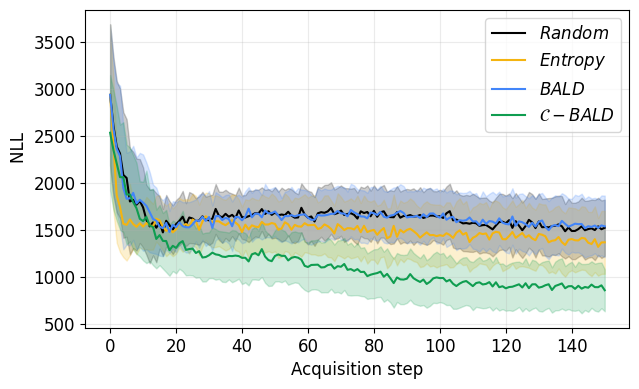

In [23]:
#plt.style.use('default')
#plt.rcParams.update({'font.size': 16})
#width = 487.8225
#fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)

plt.style.use('default')
plt.rcParams.update({'font.size': 12})
width = 236.84843*2
fig, ax = plt.subplots(1, 1, figsize=set_size(width), frameon=False)

col = 'model_tobit'
plt.plot(np.mean(random[col],axis=0), label=r'${Random}$', color='black')
plt.plot(np.mean(unc[col],axis=0), label=r'${Entropy}$', color='#F4B410')
plt.plot(np.mean(bald[col],axis=0), label=r'${BALD}$', color='#4285F9')
plt.plot(np.mean(cbald[col],axis=0),label=r'${\mathcal{C}-BALD}$', color='#0F9D50')
#plt.plot(np.mean(duobald[col],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random[col].shape[-1]), y1 = np.mean(random[col], axis=0)-0.5*np.std(random[col], axis=0),
                                                    y2 = np.mean(random[col], axis=0)+0.5*np.std(random[col], axis=0),alpha=0.2, color='black')
plt.fill_between(np.arange(unc[col].shape[-1]), y1 = np.mean(unc[col], axis=0)-0.5*np.std(unc[col], axis=0),
                                                    y2 = np.mean(unc[col], axis=0)+0.5*np.std(unc[col], axis=0),alpha=0.2, color='#F4B410')
plt.fill_between(np.arange(bald[col].shape[-1]), y1 = np.mean(bald[col], axis=0)-0.5*np.std(bald[col], axis=0),
                                                    y2 = np.mean(bald[col], axis=0)+0.5*np.std(bald[col], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald[col].shape[-1]), y1 = np.mean(cbald[col], axis=0)-0.5*np.std(cbald[col], axis=0),
                                                    y2 = np.mean(cbald[col], axis=0)+0.5*np.std(cbald[col], axis=0),alpha=0.2, color='#0F9D50')
#plt.fill_between(np.arange(avg['model_perf'].shape[-1]), y1 = np.mean(avg['model_perf'], axis=0)-np.std(avg['model_perf'], axis=0),
#                                                    y2 = np.mean(avg['model_perf'], axis=0)+np.std(avg['model_perf'], axis=0),alpha=0.50)
#plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
#                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

#plt.fill_between(np.arange(duobald[col].shape[-1]), y1 = np.mean(duobald[col], axis=0)-0.5*np.std(duobald[col], axis=0),
#                                                    y2 = np.mean(duobald[col], axis=0)+0.5*np.std(duobald[col], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("        NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig(dataset + "_performance.pdf")

In [25]:
random[col].shape

(100, 151)

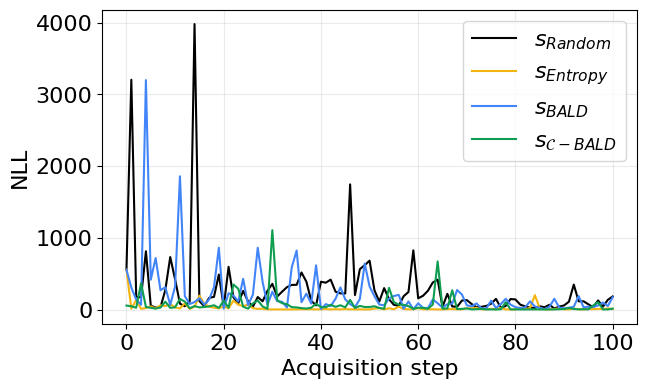

In [69]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_mae'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_mae'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_mae'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_mae'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')

#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig(dataset + "_performance.pdf")

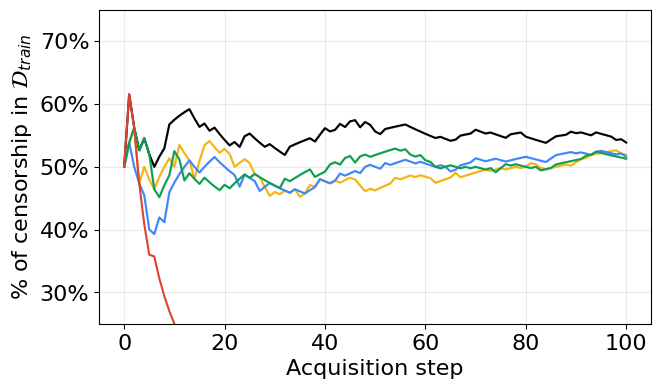

In [70]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['censored'],axis=0), label='Random', color='black')
plt.plot(np.mean(unc['censored'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['censored'],axis=0), label='Bald', color='#4285F9')
plt.plot(np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
plt.plot(np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = np.mean(random['censored'], axis=0)-np.std(random['censored'], axis=0),
                                                    y2 = np.mean(random['censored'], axis=0)+np.std(random['censored'], axis=0),alpha=0.20, color='black')

plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = np.mean(unc['censored'], axis=0)-np.std(duobald['censored'], axis=0),
                                                    y2 = np.mean(unc['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#F4B410')

plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = np.mean(bald['censored'], axis=0)-np.std(bald['censored'], axis=0),
                                                    y2 = np.mean(bald['censored'], axis=0)+np.std(bald['censored'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = np.mean(cbald['censored'], axis=0)-np.std(cbald['censored'], axis=0),
                                                    y2 = np.mean(cbald['censored'], axis=0)+np.std(cbald['censored'], axis=0),alpha=0.2, color='#0F9D50')

#plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = np.mean(duobald['censored'], axis=0)-np.std(duobald['censored'], axis=0),
#                                                    y2 = np.mean(duobald['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.ylim(0.25, 0.75)
plt.grid(alpha=0.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.legend(loc='upper right')
plt.savefig(dataset+"_censorship.pdf")
plt.show()
#plt.plot(np.mean(cbald_m['model_perf'],axis=0))

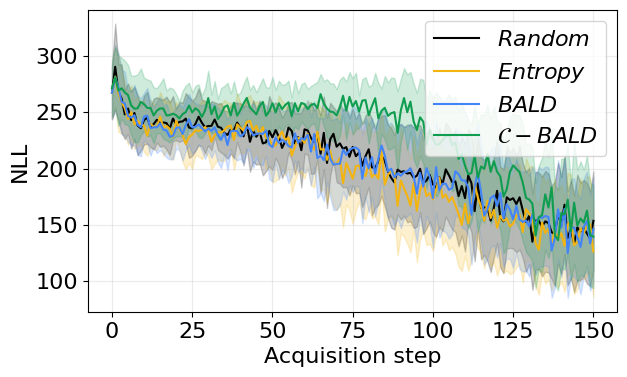

In [56]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 236.84843*2
fig, ax = plt.subplots(1, 1, figsize=set_size(width), frameon=False)
dataset = 'breastMSK'
layers = [2]
size = [64]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)
            
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)

        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)
        #with open('results/'+dataset+'/gaussbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    gaussbald = pickle.load(handle)

        col = 'model_tobit'
        plt.plot(np.mean(random[col],axis=0), label=r'${Random}$', color='black')
        plt.plot(np.mean(unc[col],axis=0), label=r'${Entropy}$', color='#F4B410')
        plt.plot(np.mean(bald[col],axis=0), label=r'${BALD}$', color='#4285F9')
        plt.plot(np.mean(cbald[col],axis=0),label=r'${\mathcal{C}-BALD}$', color='#0F9D50')
        #plt.plot(np.mean(duobald[col],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
        #plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

        plt.fill_between(np.arange(random[col].shape[-1]), y1 = np.mean(random[col], axis=0)-0.5*np.std(random[col], axis=0),
                                                            y2 = np.mean(random[col], axis=0)+0.5*np.std(random[col], axis=0),alpha=0.2, color='black')
        plt.fill_between(np.arange(unc[col].shape[-1]), y1 = np.mean(unc[col], axis=0)-0.5*np.std(unc[col], axis=0),
                                                            y2 = np.mean(unc[col], axis=0)+0.5*np.std(unc[col], axis=0),alpha=0.2, color='#F4B410')
        plt.fill_between(np.arange(bald[col].shape[-1]), y1 = np.mean(bald[col], axis=0)-0.5*np.std(bald[col], axis=0),
                                                            y2 = np.mean(bald[col], axis=0)+0.5*np.std(bald[col], axis=0),alpha=0.2, color='#4285F9')
        plt.fill_between(np.arange(cbald[col].shape[-1]), y1 = np.mean(cbald[col], axis=0)-0.5*np.std(cbald[col], axis=0),
                                                            y2 = np.mean(cbald[col], axis=0)+0.5*np.std(cbald[col], axis=0),alpha=0.2, color='#0F9D50')
        #plt.fill_between(np.arange(avg['model_perf'].shape[-1]), y1 = np.mean(avg['model_perf'], axis=0)-np.std(avg['model_perf'], axis=0),
        #                                                    y2 = np.mean(avg['model_perf'], axis=0)+np.std(avg['model_perf'], axis=0),alpha=0.50)
        #plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
        #                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

        #plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
        #                                                    y2 = np.mean(duobald['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
        #plt.title("Synthetic 1D dataset")
        plt.xlabel("Acquisition step")
        plt.ylabel("NLL")
        plt.grid(alpha=0.25)
        plt.legend(loc='upper right')
        #ax.get_xaxis().set_visible(False)
        #ax.get_yaxis().set_visible(False)
        #ax.spines['top'].set_visible(False)
        #ax.spines['right'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        #plt.legend(loc='lower lew')
        plt.tight_layout()
        plt.savefig(dataset + "_performance_2.pdf")

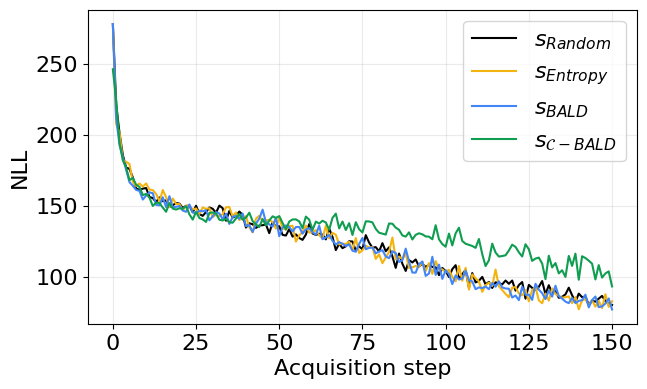

In [62]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_tobit'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_tobit'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_tobit'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_tobit'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
#plt.plot(np.mean(duobald['model_tobit'],axis=0),label=r'$s_{\mathcal{C}-BALD}$')

#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig(dataset + "_performance.pdf")

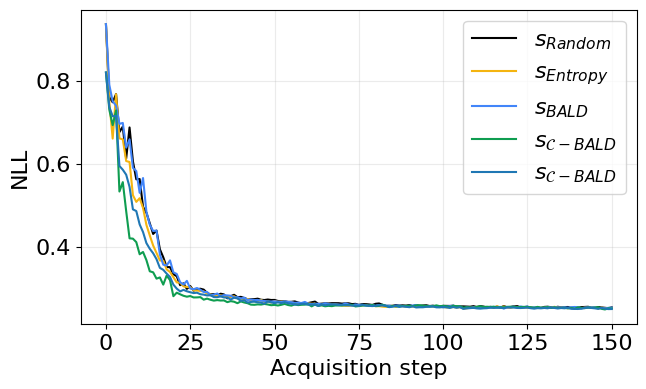

In [21]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_mae'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_mae'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_mae'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_mae'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
plt.plot(np.mean(duobald['model_mae'],axis=0),label=r'$s_{\mathcal{C}-BALD}$')

#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig(dataset + "_performance.pdf")

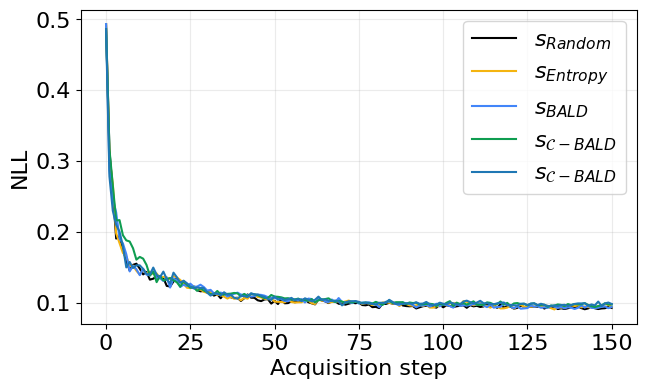

In [22]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_mae_hinge'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_mae_hinge'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_mae_hinge'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_mae_hinge'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
plt.plot(np.mean(duobald['model_mae_hinge'],axis=0),label=r'$s_{\mathcal{C}-BALD}$')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig(dataset + "_performance.pdf")

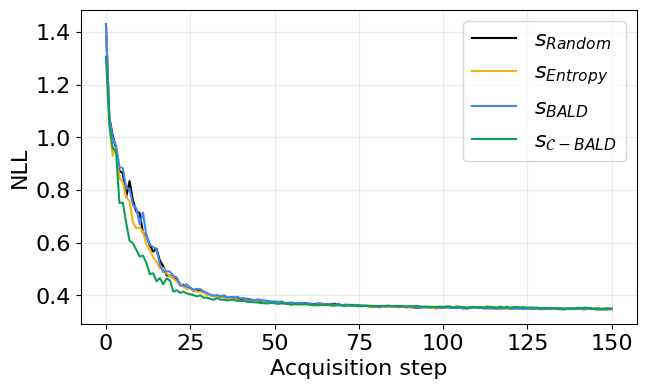

In [23]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_mae_combined'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_mae_combined'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_mae_combined'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_mae_combined'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')

#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig(dataset + "_performance.pdf")

In [24]:
dataset = 'breastMSK'
layers = [2]
size = [128]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)

        #with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    duobald = pickle.load(handle)

        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)
            

        plt.style.use('default')
        plt.rcParams.update({'font.size': 18})
        width = 487.8225
        fig, ax = plt.subplots(figsize=set_size(width*1.1,1), frameon=False)


        plt.plot(100*np.mean(random['censored'],axis=0), label=r'$s_{Random}', color='black')
        plt.plot(100*np.mean(unc['censored'],axis=0), label=r'$s_{Unc}$', color='#F4B410')
        plt.plot(100*np.mean(bald['censored'],axis=0), label=r's_{Bald}', color='#4285F9')
        plt.plot(100*np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
        #plt.plot(100*np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
        #plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

        plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = 100*(np.mean(random['censored'], axis=0)-0.5*np.std(random['censored'], axis=0)),
                                                            y2 = 100*(np.mean(random['censored'], axis=0)+0.5*np.std(random['censored'], axis=0)),alpha=0.20, color='black')

        plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = 100*(np.mean(unc['censored'], axis=0)-0.5*np.std(unc['censored'], axis=0)),
                                                            y2 = 100*(np.mean(unc['censored'], axis=0)+0.5*np.std(unc['censored'], axis=0)), alpha=0.20,color='#F4B410')

        plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = 100*(np.mean(bald['censored'], axis=0)-0.5*np.std(bald['censored'], axis=0)),
                                                            y2 = 100*(np.mean(bald['censored'], axis=0)+0.5*np.std(bald['censored'], axis=0)),alpha=0.2, color='#4285F9')
        
        plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = 100*(np.mean(cbald['censored'], axis=0)-0.5*np.std(cbald['censored'], axis=0)),
                                                            y2 = 100*(np.mean(cbald['censored'], axis=0)+0.5*np.std(cbald['censored'], axis=0)),alpha=0.2, color='#0F9D50')

        #plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = 100*(np.mean(duobald['censored'], axis=0)-0.5*np.std(duobald['censored'], axis=0)),
        #                                                    y2 = 100*(np.mean(duobald['censored'], axis=0)+0.5*np.std(duobald['censored'], axis=0)),alpha=0.2, color='#DB4430')
        #plt.title("Synthetic 1D dataset")
        plt.xlabel("Acquisition step")
        plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
        #ax.spines['top'].set_visible(False)
        #ax.spines['right'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        plt.grid(alpha=0.25)
        #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        #ax.legend(loc='upper right')
        #plt.savefig("censorship.pdf")
        plt.tight_layout()
        plt.savefig(dataset + "censorship.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'results/breastMSK/random-1282.pickle'